<img src="images/GMIT logo.jpeg" width="350" align="center">

# Programming for Data Analysis Project 2019

Peter McGowan
G00190832

### Tasks:
1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
3. Synthesise/simulate a data set as closely matching their properties as possible.
4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Background

I have chosen to simulate data about Adult Education in Ireland. I have chosen the following variables:
* Highest Qualification Awarded
* Field of Study
* Gender
* Age

## Research and Investigate

### General

The Central Statistics Office (CSO) is perhaps best known for carrying out a census every 5 years in Ireland (most recently in 2016). In addition to this, the CSO carries out a range of other important statistical work covering a broad range of themes on a rotational basis.

The General Household Survey occurs approximately quarterly and the theme varies. In Q3 & Q4 2019 the theme covered was Adult Education. Considering the HDip in Data Analytics and the makeup of its student cohort (myself included), the Adult Education Survey (AES) immediately piqued my interest when I came across it.

[CSO Adult Education Survey 2017](https://www.cso.ie/en/releasesandpublications/er/aes/adulteducationsurvey2017/)

Considering the results of this survey and the characteristics of its variables studied, I will simulate a dataset matching its qualities.

### Sample Data Characteristics

The design sample size for the survey carried out was 13,200. Of this, 4,863 valid responses were collated. I intend to simulate the 334 <i>"Persons aged 25-64 who participated in formal education, classified by the level of education participation."</i>

### Level of Education Participation

The AES aggregates these levels into four categories for my sample group. I have assigned a three-digit code to each for ease of use in analysis:
* SEC: Higher Secondary or Below
* PLC: Post Leaving Certificate
* 3LO: Third Level Non-Honours Degree
* 3LH: Third Level Honours Degree or Higher

I will simulate a dataset approximating this range, with 4 categories.

### Field of Study

The AES categories education into 12 different fields. I have assigned a three-digit code to each for ease of use in analysis:
* GEN: General Programmes & Qualifications
* EDU: Education
* ART: Arts and Humanities
* SOC: Social Sciences, Journalism and Information
* BUS: Business, Administration and Law
* NAT: Natural Sciences, Mathematics and Statistics
* INF: Information and Communication Technologies
* ENG: Engineering, Manufacturing and Construction
* AGR: Agriculture, Forestry, Fisheries and Veterinary
* HEA: Health and Welfare
* SER: Services
* OTH: Other

The AES does <u>not</u> tell us if or how the educational category is related to the level of qualification, in other words the variables are independent of each other, however they may both be related to other variables.

### Gender

The gender breakdown of those who participated in an educational activity as given in the AES report is:
* Male: 36.53%
* Female: 63.47%

The survey would indicate that females are almost twice as likely to participate in adult education. The simulated dataset will therefore reflect this.

Comparing percentages of males vs females participating in each educational field is interesting, with many fields being strongly weighted towards one gender.

Looking at how gender relates to level of education participation, it is also clear that gender is correlated with field of study. For example, males are actually twice as likely to study at 3rd Level non honours degree than females.

The gender for each row in the simulated data will therefore have to take into account three things:
* Overall gender ratio participating in adult education
* Gender ratio for each level of education participation
* Gender ratio for each field of study

This is beginning to get quite complex.

### Age

The age range covered by the survey was 18-64, however the results are presented only from ages 25-64. This gives me a convenient range for the simulated ages. Results were presented in the following bands:
* 25-34 year olds
* 35-44 year olds
* 45-54 year olds
* 55-64 year olds

In constructing the dataset it will not be necessary to limit the simulated ages to these bands - I will use the 2016 census data to generate an appropriate distribution.

Much like the gender variable, age relates to both level of education participation and field of study. Are age and gender also related? The AES doesn't actually tell us this - presumably this is due to the sample size, as this can be ascertained for those participating in non-formal education. The 2016 Census cannot provide any more information here either.

It would be reasonable to presume that there is a good chance that age and gender are related here but I have no way of directly controlling it - this will have to be simulated indirectly through the other relationships. Age will therefore have to take into account:
* Overall age ranges and their likely distributions
* Age distribution for each level of education participation
* Age distribution for each field of study

### Approach

The approach to take now bears some serious consideration - considering the indirect relationships that have to be modelled, the order of variables modelled will be critical. I will therefore take the following approach:
1. Simulate the ages first - this will require the combination of distributions for each each range given, based on actual age distributions from the 2016 Census;
2. Simulate field of study - the relative probability of each field will take into account the age (range) of the simulated person;
3. Simulate the level of education participation - the relative probability of each level will take into account the age (range) of the simulated person;
4. Simulate the gender - this must take into account both items 2. and 3., as well as the overall gender ratio in the sample.

## Synthesise

### Preliminaries

Firstly, import several libraries to manage, simulate and visualise.

In [1]:
# Import numpy to analyse it
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Magic command to ensure that plots render inline
%matplotlib inline

In [3]:
# Control Seaborn aesthetics
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

## Generate Data

First we will create an empty pandas dataframe to hold the data.

In [4]:
df = pd.DataFrame(columns = ["Age", "Field", "Qual", "Gender"])

In [5]:
df

,Age,Field,Qual,Gender


### Age Data

The age distribution should be realistic. We will import data from the Central Statistics Office that describes the ages recorded by the 2016 Census. Although this is a measure of the distribution of ages of the entire population, we will assume that the distribution holds true for our sample set.

The data has been generated and downloaded as a csv from [Statbank](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=E3002&PLanguage=0.
Only ages from 25 to 64 have been considered. I have extracted the data required to a csv file in order to read it in to a new DataFrame for some basic analysis.

#### Import Age Data & Analyse

In [78]:
f = pd.read_csv("data\Population_2016_by_Age_adj.csv") # Import csv file using pandas
dfAge = pd.DataFrame(f) # Create a dataframe from the csv data
round(dfAge.describe(),2)

,Age,Male,Female,Total
count,40.00,40.00,40.00,40.00
mean,44.50,31263.00,32269.35,63532.35
std,11.69,4761.64,5265.15,9984.04
min,25.00,22402.00,22642.00,45044.00
25%,34.75,28163.75,28551.50,56858.50
50%,44.50,30787.00,31522.00,62390.00
75%,54.25,35342.75,35973.75,71409.00
max,64.00,40892.00,42304.00,83196.00


There is a lot of data here - a visualisation would be appropriate. We can generate a relational plot in Seaborn to relate Age to population numbers.

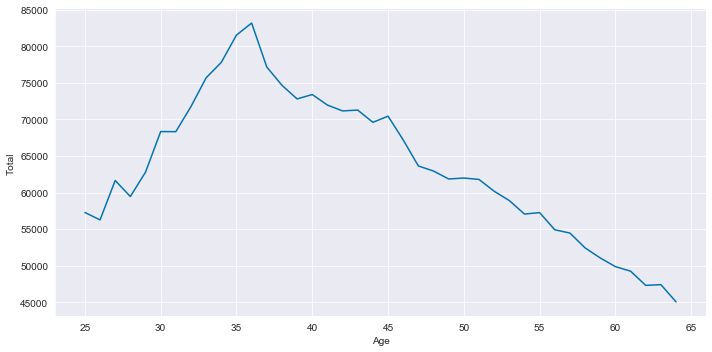

In [7]:
sns.relplot(x="Age", y="Total", kind="line", data=dfAge, height=5, aspect=2) # Use aspect to make plot wider

The age profile rapidly rises from 25 to the mode (somewhere slightly above 35) and then generally reduces more gradually towards 64. It doesn't look like a Normal (Gaussian) distribution - but thankfully NumPy's random package includes a wide range of alternative distributions. The [numpy.random.triangular](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.triangular.html) looks like a good option: 
> The triangular distribution is often used in ill-defined problems where the underlying distribution is not known, but some knowledge of the limits and mode exists. Often it is used in simulations.

This looks (almost) ideal. Although the two "diagonals" of the triangle aren't perfectly linear, it should be possible to simulate and approximation, particularly since the numpy functions I'll use will introduce some randomness. I will now need to carry out some more complex statistical analysis of the input data. Simply returning the mean or standard deviation of the ages will not prove very useful here as they need to be weighted by the population. The statsmodels package has a "descriptive statistics with weights" module (DescrStatsW) that will be very useful, I can import that first.

#### Weighted Stats

In [90]:
from statsmodels.stats.weightstats import DescrStatsW

Now I can use it to generate a weighted age profile from the Age and Total (population) columns.

In [91]:
wAge = DescrStatsW(dfAge["Age"], weights=dfAge["Total"])
print("Weighted mean age:", round(wAge.mean, 2))
print("Weighted standard deviation:", round(wAge.std, 2))

Weighted mean age: 43.33
Weighted standard deviation: 10.97


So now i have the weighted mean and weighted standard deviation, I will be able to use this to check the accuracy of the simulated data against the real data.

#########The next step will be to create a new column with the proportion of population for each age.

In [100]:
list(wAge)

TypeError: 'DescrStatsW' object is not iterable

#### Building a Triangular Distribution

In order to create a triangular distribution, I need to find three key pieces of information:
* Lower limit: the Starting point of the triangle. 25 is not the actual starting point - the above distribution is truncated from the full range of ages! I'll assume 0 is the actual starting point, I can confirm the validity of this later.
* Mode: The highest frequency i.e. the age at which the greatest proportion of the population is. It looks to be slightly above 35, but I can calculate this to be sure.
* Upper limit: The Ending point of the triangle. Again, the distribution above is truncated so I will need to model the whole age range - I'll assume 100 for convenience and confirm the validity later.

One key piece of information that I need is the mode of the data. The mode will simply be the age where the total population value is highest (in the imported data), so I can extract this from the DataFrame.

In [118]:
# Creating a proportion column
ageMode = dfAge.query('Total == Total.max()').iloc[0,0] # Slicing to get value of age where the highest total value is
ageMode

36

The modal age is therefore 36, as expected. I'll build the triangular distribution now. The end result I'm looking for is 334 value but I need to generate a larger number and truncate it. To play it safe and get an accurate distribution, I'll generate 100,000 values.

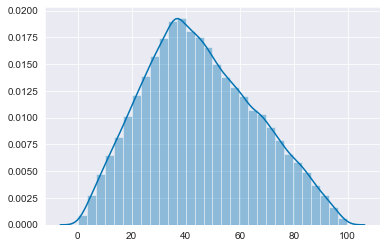

In [119]:
ageTri = np.random.triangular(0, ageMode, 100, 100000)
sns.distplot(ageTri, bins = 30) # Plot the distribution

The above distribution looks fairly reasonable, but it is of course an array of floats and I really only care about ages an integers. I can convert it fairly easily.

In [136]:
np.rint(ageTri) # Round each value to its nearest integer equivalent

array([25., 25., 25., ..., 64., 64., 64.])

This looks perfect now. Next I'd like to get rid of the ages outside of my range.

In [137]:
ageTri = ageTri[ageTri >= 25] # Subset the data where age is 25 or over
ageTri = ageTri[ageTri < 65] # Subset the data where age is under 65

Some more tweaks to the array I'd like to do are: 1. convert all ages to integers and 2. sort them into numerical order.

In [140]:
ageTri = ageTri.astype(int) # Convert each value from a float to an integer
ageTri = np.sort(ageTri) # Sort into ascending order
ageTri

array([25, 25, 25, ..., 64, 64, 64])

The array is now a sorted array of integers. I'll have a look at its shape (i.e. its size) now:

In [19]:
ageTri.shape

(64129,)

Its still several orders of magnitude bigger than what I need, but it'll be useful to look at the distribution again.

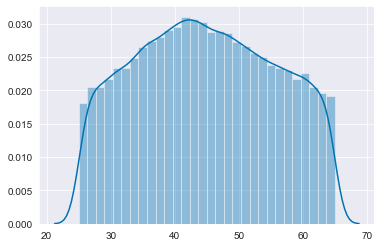

In [21]:
sns.distplot(ageTri, bins = 30)

This looks close enough to what I wanted - its not exact but I'm not too worried as the data source is just being used as an estimate and I think it'll give a reasonable approximation of the likely age profile. The next step is a tricky one - reducing the array down into 334 figures whilst conserving the distribution.

In [142]:
ssize = 334 # Required sample size

skip = ageTri.shape[0]/ssize # Number of entries to be skipped if I take every ssize'th item

#skipint = int(round(skip,0)) # Round and convert to integer
print("Skip value (float):", skip)
#print("Skip value (int):", skipint)

Skip value (float): 190.03293413173654


I'll create an empty array and fill it from the existing array using a loop, using the skip value calculated above to jump through it in even steps - thankfully I've sorted it by size or I'd be extracting random values.

In [143]:
arr = np.array([0]) # Create an empty array to hold my values
skipcurrent = 0.0 # Instantiate
skiptotal = 0 # Instantiate

# Keep running until the skiptotal value reaches or exceeds the number of items in the existing array
while skiptotal < ageTri.shape[0]:
    skipcurrent = skipcurrent + skip # Update the skipcurrent value
    skiptotal = int(round(skipcurrent,0)) # Set the skiptotal value
    arr = np.append(arr, skiptotal) # Append this value to the output array

Now I'll look at the size of the output array:

In [ ]:
###### why 335?

In [144]:
arr.shape[0]

335

In [25]:
ageTriSub = np.array([])
ageTriSub

array([], dtype=float64)

In [26]:
np.argmax(ageTri)

64128

In [27]:
for i in arr:
    if i <= np.argmax(ageTri):
        ageTriSub = np.append(ageTriSub, ageTri[i])

In [28]:
ageTriSub

array([25.0002045 , 25.17649402, 25.34252382, 25.51007497, 25.67466389,
       25.84478852, 25.99992219, 26.15716814, 26.32265769, 26.47276053,
       26.61729296, 26.7793709 , 26.92727846, 27.06028751, 27.21620696,
       27.36032781, 27.49688547, 27.64010076, 27.76626334, 27.9345156 ,
       28.08252315, 28.23989059, 28.39115142, 28.52118889, 28.64901695,
       28.80356093, 28.94859064, 29.09469773, 29.23010517, 29.3604875 ,
       29.51238268, 29.66735891, 29.80389156, 29.927803  , 30.05763481,
       30.19097281, 30.32601377, 30.46679484, 30.59625376, 30.72108759,
       30.85498389, 30.97310366, 31.10334486, 31.22793442, 31.34663078,
       31.47560303, 31.61332396, 31.74206386, 31.87375953, 31.99818633,
       32.12413099, 32.27150483, 32.40900715, 32.53176814, 32.65291941,
       32.77679471, 32.89270709, 33.01907481, 33.14441632, 33.26294521,
       33.39753509, 33.51704513, 33.62586624, 33.75070364, 33.88120047,
       34.00369371, 34.11597522, 34.22653276, 34.33875274, 34.46

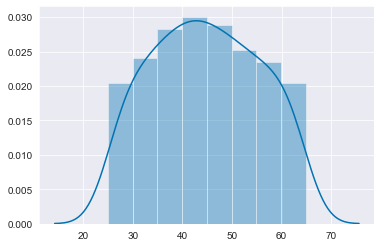

In [29]:
sns.distplot(ageTriSub)

In [30]:
print("Full dataset mean:", ageTri.mean())
print("Full dataset stdev:", ageTri.std())

print("\nSub dataset mean:",ageTriSub.mean())
print("Sub dataset stdev:", ageTriSub.std())

Full dataset mean: 44.82990144747998
Full dataset stdev: 10.791264944798488

Sub dataset mean: 44.77032086458219
Sub dataset stdev: 10.790503644384936


In [31]:
np.rint(ageTriSub)
df['Age'] = ageTriSub.astype(int)

In [32]:
df.loc[df['Age'] <= 34, "Age_Range"] = "25-34"
df.loc[(df['Age'] > 34) & (df['Age'] <=44), "Age_Range"] = "35-44"
df.loc[(df['Age'] > 44) & (df['Age'] <=54), "Age_Range"] = "45-54"
df.loc[df['Age'] > 54, "Age_Range"] = "55-64"

In [33]:
df

,Age,Field,Qual,Gender,Age_Range
0,25,NaN,NaN,NaN,25-34
1,25,NaN,NaN,NaN,25-34
2,25,NaN,NaN,NaN,25-34
3,25,NaN,NaN,NaN,25-34
4,25,NaN,NaN,NaN,25-34
5,25,NaN,NaN,NaN,25-34
6,25,NaN,NaN,NaN,25-34
7,26,NaN,NaN,NaN,25-34
8,26,NaN,NaN,NaN,25-34
9,26,NaN,NaN,NaN,25-34


In [34]:
ageRanges = df['Age_Range']

### Field of Study Data

In [35]:
f = pd.read_excel("data\AES2017TBL2b.xlsx") # Import xlsx file using pandas
dfField = pd.DataFrame(f) # Create a dataframe from the csv data
#dfField

In [36]:
dfField.drop(dfField.loc[11:].index, axis=0, inplace=True)
dfField.drop([0, 2, 3, 6], axis=0, inplace=True)
dfField.drop(dfField.columns[[0, 14]], axis=1, inplace=True)

In [37]:
dfField.columns = ['ITEM', 'GEN', 'EDU', 'ART', 'SOC', 'BUS', 'NAT', 'INF', 'ENG', 'AGR', 'HEA', 'SER', 'OTH']
dfField.drop([1], axis=0, inplace=True)
dfField

,ITEM,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
4,Male,10.3,3.6,2.6,0.8,22.7,6.8,7.6,13.3,4.7,12.3,2.3,13.2
5,Female,2.5,11.4,6.2,2,30.1,1.6,6.2,2.8,1.5,22.1,2.1,11.5
7,25-34,6.6,8.1,1.7,0.6,30,5.9,10.4,8.9,1.8,15.2,1.4,9.3
8,35-44,6.8,8.4,7.8,0.6,28.6,1.5,2.9,6.5,5.5,15.2,0.9,15.3
9,45-54,2.2,9.9,3.5,2.2,20.5,4.1,6.4,5.4,0,27.1,6.4,12.3
10,55-64,[3.3]3,[2.8],[11.2],[9.4],[17.7],[0.0],[3.8],[3.4],[3.5],[26.8],[2.8],[15.3]


In [38]:
fieldList = list(dfField.columns.values)

In [39]:
dfField.replace(to_replace=r'\[||\]\d||\]', value='', regex=True, inplace=True)
dfField.index  = dfField['ITEM']
dfField.drop(dfField.columns[[0]], axis=1, inplace=True)
for col in fieldList[1:]:
    dfField[col] = dfField[col].astype(float)
dfField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
ITEM,,,,,,,,,,,,
Male,10.3,3.6,2.6,0.8,22.7,6.8,7.6,13.3,4.7,12.3,2.3,13.2
Female,2.5,11.4,6.2,2.0,30.1,1.6,6.2,2.8,1.5,22.1,2.1,11.5
25-34,6.6,8.1,1.7,0.6,30.0,5.9,10.4,8.9,1.8,15.2,1.4,9.3
35-44,6.8,8.4,7.8,0.6,28.6,1.5,2.9,6.5,5.5,15.2,0.9,15.3
45-54,2.2,9.9,3.5,2.2,20.5,4.1,6.4,5.4,0.0,27.1,6.4,12.3
55-64,3.3,2.8,11.2,9.4,17.7,0.0,3.8,3.4,3.5,26.8,2.8,15.3


In [40]:
# https://stackoverflow.com/a/46539921

In [41]:
fieldList

['ITEM',
 'GEN',
 'EDU',
 'ART',
 'SOC',
 'BUS',
 'NAT',
 'INF',
 'ENG',
 'AGR',
 'HEA',
 'SER',
 'OTH']

In [42]:
def fieldGen(item):
    probSer = pd.Series(dfField.loc[(item)].values)
    probList = probSer/100
    probList /= probList.sum() # normalise to add up to 1
    x = np.random.choice(fieldList[1:], 1, p=list(probList))
    return x[0]

In [43]:
genFieldList = []
for i in ageRanges:
    x = fieldGen(i)
    genFieldList.append(x)

#genFieldList

In [44]:
df['Field'] = genFieldList
df

,Age,Field,Qual,Gender,Age_Range
0,25,BUS,NaN,NaN,25-34
1,25,OTH,NaN,NaN,25-34
2,25,NAT,NaN,NaN,25-34
3,25,BUS,NaN,NaN,25-34
4,25,BUS,NaN,NaN,25-34
5,25,ENG,NaN,NaN,25-34
6,25,BUS,NaN,NaN,25-34
7,26,GEN,NaN,NaN,25-34
8,26,ENG,NaN,NaN,25-34
9,26,BUS,NaN,NaN,25-34


### Qualification Data

In [45]:
f = pd.read_excel("data\AES2017TBL2a.xlsx") # Import xlsx file using pandas
dfQual = pd.DataFrame(f) # Create a dataframe from the csv data
#dfQual

In [46]:
dfQual.drop(dfQual.loc[11:].index, axis=0, inplace=True)
dfQual.drop([0, 2, 3, 6], axis=0, inplace=True)
dfQual.drop(dfQual.columns[[0, 6]], axis=1, inplace=True)
#dfQual

In [47]:
dfQual.columns = ['ITEM', 'SEC', 'PLC', '3LO', '3LH']
dfQual.drop([1], axis=0, inplace=True)
dfQual

,ITEM,SEC,PLC,3LO,3LH
4,Male,17.3,23.4,25,34.3
5,Female,12.7,35.2,12.4,39.7
7,25-34,15.1,20.4,22.5,42.1
8,35-44,15.1,36.7,12.2,35.9
9,45-54,5,38.5,21.8,34.7
10,55-64,[32.8]2,[40.6],[3.6],[23.1]


In [48]:
qualList = list(dfQual.columns.values)
qualList

['ITEM', 'SEC', 'PLC', '3LO', '3LH']

In [49]:
dfQual.replace(to_replace=r'\[||\]\d||\]', value='', regex=True, inplace=True)
dfQual.index  = dfQual['ITEM']
dfQual.drop(dfQual.columns[[0]], axis=1, inplace=True)
dfQual

,SEC,PLC,3LO,3LH
ITEM,,,,
Male,17.3,23.4,25,34.3
Female,12.7,35.2,12.4,39.7
25-34,15.1,20.4,22.5,42.1
35-44,15.1,36.7,12.2,35.9
45-54,5,38.5,21.8,34.7
55-64,32.8,40.6,3.6,23.1


In [50]:
for col in qualList[1:]:
    dfQual[col] = dfQual[col].astype(float)
dfQual

,SEC,PLC,3LO,3LH
ITEM,,,,
Male,17.3,23.4,25.0,34.3
Female,12.7,35.2,12.4,39.7
25-34,15.1,20.4,22.5,42.1
35-44,15.1,36.7,12.2,35.9
45-54,5.0,38.5,21.8,34.7
55-64,32.8,40.6,3.6,23.1


In [51]:
qualList

['ITEM', 'SEC', 'PLC', '3LO', '3LH']

In [52]:
def qualGen(item):
    probSer = pd.Series(dfQual.loc[(item)].values)
    probList = probSer/100
    probList /= probList.sum() # normalise to add up to 1
    x = np.random.choice(qualList[1:], 1, p=list(probList))
    return x[0]

In [53]:
genQualList = []
for i in ageRanges:
    x = qualGen(i)
    genQualList.append(x)

#genQualList

In [54]:
df['Qual'] = genQualList
df

,Age,Field,Qual,Gender,Age_Range
0,25,BUS,SEC,NaN,25-34
1,25,OTH,SEC,NaN,25-34
2,25,NAT,3LH,NaN,25-34
3,25,BUS,3LO,NaN,25-34
4,25,BUS,3LO,NaN,25-34
5,25,ENG,PLC,NaN,25-34
6,25,BUS,3LH,NaN,25-34
7,26,GEN,SEC,NaN,25-34
8,26,ENG,3LH,NaN,25-34
9,26,BUS,PLC,NaN,25-34


### Gender Data

This will be a categorical variable, either "F" or "M".

In [55]:
genders = ["F", "M"]
genderF = 212
genderM = 122
genderProb = [(genderF/ (genderF+genderM)), genderM/ (genderF+genderM)]
genderList = np.random.choice(genders, size=334, p=genderProb)

In [56]:
genderList

array(['M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F',
       'F', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'F',
       'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M',
       'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'F',
       'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M',
       'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M',
       'M', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'M',
       'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M',
       'M', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
       'F', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F',
       'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F

In [57]:
dfGenField = pd.DataFrame(columns = fieldList[1:])
dfGenField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH


In [58]:
fieldM = dfField.loc['Male', :]*genderM
fieldF = dfField.loc['Female', :]*genderF

fieldMPer = []
fieldFPer = []

for i in range(len(fieldM)):
    x = (fieldM[i] + fieldF[i])

    y = fieldM[i]/x
    fieldMPer.append(y)
    
    z = fieldF[i]/x
    fieldFPer.append(z)

In [59]:
dfGenField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH


In [60]:
dfGenField=dfGenField.append(pd.Series(fieldMPer, index=dfGenField.columns), ignore_index=True)
dfGenField=dfGenField.append(pd.Series(fieldFPer, index=dfGenField.columns), ignore_index=True)
dfGenField.index = ['Male%', 'Female%']
dfGenField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
Male%,0.703347,0.153782,0.19441,0.187117,0.302647,0.709788,0.413633,0.732154,0.643258,0.242588,0.386608,0.397787
Female%,0.296653,0.846218,0.80559,0.812883,0.697353,0.290212,0.586367,0.267846,0.356742,0.757412,0.613392,0.602213


In [61]:
dfGenQual = pd.DataFrame(columns = qualList[1:])

In [62]:
qualM = dfQual.loc['Male', :]*genderM
qualF = dfQual.loc['Female', :]*genderF

qualMPer = []
qualFPer = []

for i in range(len(qualM)):
    x = qualM[i] + qualF[i]
    
    y = qualM[i]/x
    qualMPer.append(y)
    
    z = qualF[i]/x
    qualFPer.append(z)

In [63]:
dfGenQual

,SEC,PLC,3LO,3LH


In [64]:
dfGenQual=dfGenQual.append(pd.Series(qualMPer, index=dfGenQual.columns), ignore_index=True)
dfGenQual=dfGenQual.append(pd.Series(qualFPer, index=dfGenQual.columns), ignore_index=True)
dfGenQual.index = ['Male%', 'Female%']
dfGenQual

,SEC,PLC,3LO,3LH
Male%,0.439434,0.276703,0.537085,0.332085
Female%,0.560566,0.723297,0.462915,0.667915


In [65]:
def probGen(i):
    x = df['Field'].iloc[i]
    y = df['Qual'].iloc[i]
    probM1 = dfGenField[x][0]
    probM2 = dfGenQual[y][0]
    probMT = (probM1 + probM2)/2
    probF1 = dfGenField[x][1]
    probF2 = dfGenQual[y][1]
    probFT = (probF1 + probF2)/2
    #print("M:", probM1, probM2, probMT)
   #print("F:", probF1, probF2, probFT)
    return probFT, probMT

In [66]:
genProbList = []
for i in range(len(df['Age'])):
    x = np.random.choice(genders, 1, p=(probGen(i)))
    genProbList.append(x[0])
    
genProbList

['F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F'

In [67]:
df['Gender'] = genProbList
df

,Age,Field,Qual,Gender,Age_Range
0,25,BUS,SEC,F,25-34
1,25,OTH,SEC,M,25-34
2,25,NAT,3LH,M,25-34
3,25,BUS,3LO,F,25-34
4,25,BUS,3LO,F,25-34
5,25,ENG,PLC,M,25-34
6,25,BUS,3LH,F,25-34
7,26,GEN,SEC,M,25-34
8,26,ENG,3LH,M,25-34
9,26,BUS,PLC,M,25-34


In [68]:
#df.drop(df.columns[-1], axis=1, inplace=True)
df

,Age,Field,Qual,Gender,Age_Range
0,25,BUS,SEC,F,25-34
1,25,OTH,SEC,M,25-34
2,25,NAT,3LH,M,25-34
3,25,BUS,3LO,F,25-34
4,25,BUS,3LO,F,25-34
5,25,ENG,PLC,M,25-34
6,25,BUS,3LH,F,25-34
7,26,GEN,SEC,M,25-34
8,26,ENG,3LH,M,25-34
9,26,BUS,PLC,M,25-34


In [69]:
df['Field'].value_counts()
# modify to include percentage of total for comparison

BUS    88
HEA    69
OTH    29
ART    23
ENG    22
EDU    20
GEN    20
INF    18
AGR    14
NAT    13
SER    10
SOC     8
Name: Field, dtype: int64

In [70]:
df['Qual'].value_counts()
# modify to include percentage of total for comparison

3LH    114
PLC    109
SEC     62
3LO     49
Name: Qual, dtype: int64

In [71]:
df['Gender'].value_counts()
# modify to include percentage of total for comparison

F    208
M    126
Name: Gender, dtype: int64

In [72]:
dfGrp = df.groupby('Age_Range')
dfGrp

In [73]:
dfGrp['Qual'].value_counts()

Age_Range  Qual
25-34      3LH     37
           PLC     16
           3LO     12
           SEC      9
35-44      3LH     33
           PLC     27
           SEC     21
           3LO     17
45-54      PLC     42
           3LH     27
           3LO     17
           SEC      4
55-64      SEC     28
           PLC     24
           3LH     17
           3LO      3
Name: Qual, dtype: int64

In [74]:
dfGrp['Field'].value_counts()

Age_Range  Field
25-34      BUS      24
           HEA      17
           ENG      11
           INF       7
           GEN       4
           NAT       3
           ART       2
           EDU       2
           OTH       2
           SER       1
           SOC       1
35-44      BUS      28
           OTH      13
           AGR      10
           HEA      10
           GEN       9
           ART       8
           EDU       8
           ENG       6
           NAT       3
           INF       1
           SER       1
           SOC       1
45-54      HEA      23
           BUS      20
           EDU       9
           OTH       8
           SER       8
           INF       7
           NAT       7
           ENG       3
           GEN       3
           ART       1
           SOC       1
55-64      HEA      19
           BUS      16
           ART      12
           OTH       6
           SOC       5
           AGR       4
           GEN       4
           INF       3
           ENG   

In [75]:
dfSEX = df.groupby('Gender')
dfSEX

In [76]:
dfSEX['Qual'].value_counts()

Gender  Qual
F       3LH     76
        PLC     76
        SEC     34
        3LO     22
M       3LH     38
        PLC     33
        SEC     28
        3LO     27
Name: Qual, dtype: int64

In [77]:
dfSEX['Field'].value_counts()

Gender  Field
F       BUS      56
        HEA      49
        OTH      18
        ART      17
        EDU      16
        ENG       9
        SER       9
        INF       8
        GEN       7
        NAT       7
        SOC       7
        AGR       5
M       BUS      32
        HEA      20
        ENG      13
        GEN      13
        OTH      11
        INF      10
        AGR       9
        ART       6
        NAT       6
        EDU       4
        SER       1
        SOC       1
Name: Field, dtype: int64

## Results